##### We train model to recognise single fruit, 
##### model is abridged version of VGG16, https://datagen.tech/guides/computer-vision/vgg16/
#####
##### After model is trained , we check accuracy
#####
##### Then we apply R CNN approach: picture of choice is broken into multiple sub pics(proposals)
#####  and we employ previously trained model to check if sub pic contains apple
#####
##### Current implementation does not require manual labelling

In [1]:
# upload libraries to prepare data
import os
import numpy as np
import cv2

##### As first step we upload data from Train folder to design a model which
##### can recognise a sigle apple

In [2]:
# lists to store pixels and classes
img_data_array=[]
class_name=[]

# values to set height and width to each picture
IMG_HEIGHT = 224
IMG_WIDTH = 224

# location of folders with training data
folder_train = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\Train"

In [3]:
# verify location
folder_train

'D:\\0_Desctop_Files\\Learning\\UTM_Project\\1_Prototype\\Train'

In [4]:
## import pictures and generate labels to train model

img_data_array=[] # store pixels 
class_name=[] # store classes

for dir1 in os.listdir(folder_train): # loop through files in each folder
    for dir2 in os.listdir ( os.path.join(folder_train, dir1) ):
        
        if dir1.split("_")[1]=="y": # if file contains "y" in name , then its 1, red apple, 0 otherwise
            class_name.append(1)
        else:
            class_name.append(0)
            
        image_path= os.path.join(folder_train, dir1,  dir2)

        image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB
        
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), # make all pictures standard
                         interpolation = cv2.INTER_AREA)
       
        img_data_array.append(image) # append each picture to single structure
       

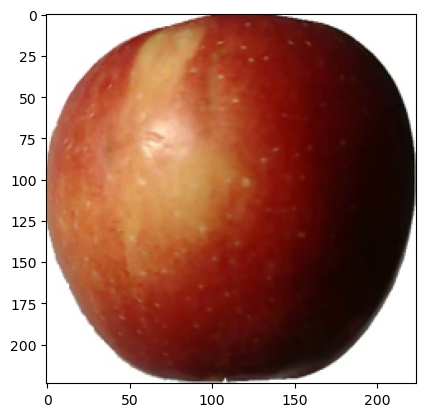

In [5]:
import matplotlib.pyplot as plt
plt.imshow( img_data_array[0] ) # visualise first picture to check for errors

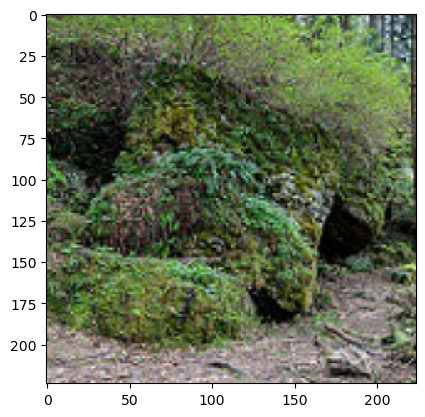

In [6]:
plt.imshow( img_data_array[3000] )  # debug

In [7]:
# data to arrays and then to float
x_train = np.array( img_data_array )
y_train = np.array(class_name)

In [8]:
x_train = x_train.astype('float32')
x_train /= 255

In [9]:
# x_train[0]
del img_data_array , class_name

In [10]:
x_train.shape

(5160, 224, 224, 3)

In [11]:
y_train.shape

(5160,)

In [12]:
## we want class of interest toa be more than 20%
sum(y_train) / y_train.shape[0]

0.47810077519379846

In [13]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [15]:
#  https://www.analyticsvidhya.com/blog/2021/08/beginners-guide-to-convolutional-neural-network-with-implementation-in-python/
from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPool2D

from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

from keras.losses import binary_crossentropy

from keras.optimizers import Adam

In [18]:
# Models' design can be challenged , at prototype stage we would 
# expect low running time to make sure that fundamentals are implemented
# properly(making error fast), 
# current Architecture is based on Vgg 16 model which may take up to 1 hour per 1 epoch

model =  Sequential()
# current  version should take up to 15 min for 1 epoch

model.add( Conv2D(32,
                  kernel_size=(5,5),
                  activation="relu",
                  padding = "same" , 
                  input_shape = (IMG_HEIGHT,IMG_WIDTH,3) ) )


In [19]:

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

## We need to flatten  before output layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dropout(0.1)) # rarely included on i-net examples of CNN
model.add(Dense(1, activation='sigmoid')) # we forecast 1 class

In [20]:
opt = Adam(learning_rate=0.001) # usually its 0.001

model.compile(optimizer=opt, 
             loss=binary_crossentropy, # prob of 1 class
             metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 256)      

In [22]:
history = model.fit(
            x_train, 
            y_train,
            batch_size=50,
            epochs=5,
            verbose=1,
            validation_split=0.2)

Epoch 1/5
83/83 [==============================] - 709s 8s/step - loss: 0.0969 - accuracy: 0.9867 - val_loss: 1.7679 - val_accuracy: 0.8159
Epoch 2/5
83/83 [==============================] - 731s 9s/step - loss: 3.8792e-05 - accuracy: 1.0000 - val_loss: 4.0875 - val_accuracy: 0.6986
Epoch 3/5
83/83 [==============================] - 732s 9s/step - loss: 6.8190e-05 - accuracy: 1.0000 - val_loss: 3.2186 - val_accuracy: 0.7926
Epoch 4/5
83/83 [==============================] - 737s 9s/step - loss: 0.0356 - accuracy: 0.9947 - val_loss: 12.7864 - val_accuracy: 0.6860
Epoch 5/5
83/83 [==============================] - 729s 9s/step - loss: 0.1453 - accuracy: 0.9903 - val_loss: 6.6051 - val_accuracy: 0.6870


##### Now Upload Test Data to check the perfomance, accuracy of image classification, 
##### apple or other  , 1 or 0, model will forecast probabilities
##### Essentially, we verify how efficiently model can recognise single red apple, 
##### because later we would breake the test picture into multiple sub pics (proposals), 
##### looking for single apple on each of it

In [23]:
# lists to store test pixels and classes( for accuracy check)

img_data_array_test=[]
class_name_test=[]

folder_test = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\Test_Classification"
folder_test

'D:\\0_Desctop_Files\\Learning\\UTM_Project\\1_Prototype\\Test_Classification'

In [24]:
# same loop and script as for importing train data
for dir1 in os.listdir(folder_test):
    for dir2 in os.listdir ( os.path.join(folder_test, dir1) ):
        
        if dir1.split("_")[1]=="y":
            class_name_test.append(1)
        else:
            class_name_test.append(0)
    
        image_path= os.path.join(folder_test, dir1,  dir2)

        image= cv2.imread( image_path, cv2.IMREAD_COLOR)
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),
                         interpolation = cv2.INTER_AREA)
       
        img_data_array_test.append(image)
       

In [25]:
x_test = np.array( img_data_array_test )
y_test = np.array(class_name_test)

In [26]:
x_test = x_test.astype('float32')
x_test /= 255

In [27]:
x_test.shape

(1759, 224, 224, 3)

In [28]:
y_test.shape

(1759,)

In [29]:
sum(y_test) / y_test.shape[0]

0.6117111995451961

In [30]:
y_test

array([1, 1, 1, ..., 0, 0, 0])

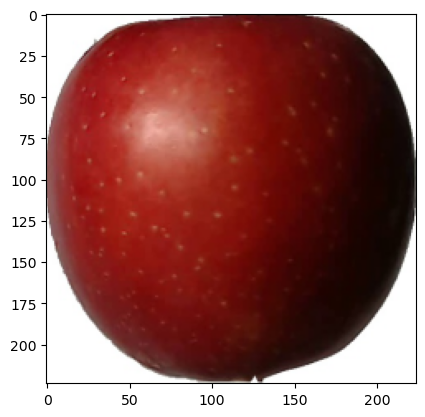

In [31]:
plt.imshow( x_test[1] ) # debug

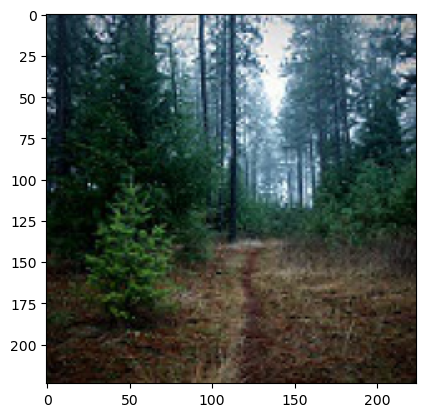

In [32]:
plt.imshow( x_test[1300] )  # debug

In [33]:
## Generate forecast with test data
out = model.predict( x_test ) # apr. 1 min, produce prob. vector

55/55 [==============================] - 47s 842ms/step


In [34]:
# Libraries for accuracy metrics 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [35]:
out # debug

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [36]:
np.unique( np.round(out,2) )

array([0.  , 0.01, 0.02, 0.22, 0.23, 0.4 , 0.94, 0.99, 1.  ],
      dtype=float32)

In [37]:
out_classes = ( out > 0.7 ) + 0 # to whole numbers
out_classes

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [38]:
np.unique( np.round(out_classes,2) )

array([0, 1])

In [39]:
confusion_matrix( y_test , out_classes)

array([[ 523,  160],
       [   0, 1076]], dtype=int64)

In [40]:
f1_score( y_test , out_classes)

0.930795847750865

In [41]:
accuracy_score( y_test , out_classes)

0.9090392268334281

##### Script below seeks to implement R-CNN method for object detection, 
##### idea is to breake picture into smaller sub pics (proposals)
##### and use previously trained model to check if sub pic contains apple
#####
##### R-CNN would be implemented via switchToSelectiveSearchFast() method
#####
##### !!! We may not require to manually label apples on each picture
##### because training dataset already contains picture of single apple
#####
##### Now, apply switchToSelectiveSearchFast() to verify if algo can operate over 1 picture , 
##### switchToSelectiveSearchFast() allows to breake picture into small 
##### pics and check if apple is present on the respective piece

In [42]:
## Import picture with multiple apples

img_data_array_test=[]
class_name_test=[]

folder_test = r"D:\0_Desctop_Files\Learning\UTM_Project\Test_Object_Detection"

In [43]:
## focus on 1 picture
## we want to explore functionality of switchToSelectiveSearchFast()

debug_photo = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\Test_Object_Detection\apple_4.jpg"

In [44]:
# initiate class
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

# upload image for experiment
image= cv2.imread( debug_photo, cv2.IMREAD_COLOR)

image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),
                         interpolation = cv2.INTER_AREA)

# maintain RGB scheme
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

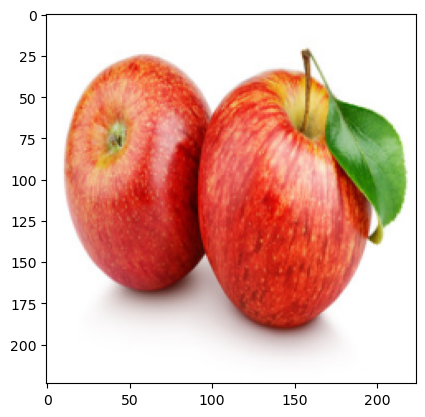

In [46]:
plt.imshow( image ) # now , ideally , we want to detect each apple 
# on picture

In [47]:
# genenerate coordinats of sub picture( proposal )
ss.setBaseImage( image ) # we  define image we want to breake into smaller pics

ss.switchToSelectiveSearchQuality() # we initiate method to breake the main picture
#  switchToSelectiveSearchQuality , switchToSelectiveSearchFast

ssresults = ss.process() # we generate coordidates of sub pics 

# https://pyimagesearch.com/2020/06/29/opencv-selective-search-for-object-detection/

In [48]:
len(ssresults) # did not found how to set number of proposals manually
               # larger the image, more proposals are generated

915

In [49]:
x,y,w,h = ssresults[0] # x ,y , width and height, we will cut
 # this part from uploaded main picture

In [50]:
imout = image.copy()

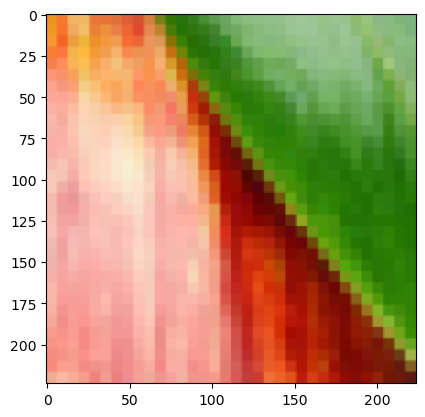

In [51]:
timage = imout[y:y+h,x:x+w] # we cut smaller sub pic

# scale sub pic to fit input requirements
resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)

plt.imshow( resized ) # visulise piece of initial picture

In [52]:
resized.shape # need to add batch size 

(224, 224, 3)

In [53]:
resized = np.expand_dims(resized, axis=0) #
resized.shape # np.expand_dims(resized, axis=0) generates batch size

(1, 224, 224, 3)

In [54]:
# does the sub pic contains picture of apple ,
# as argued by our previously trained model ?

out= model.predict(resized) # model was trained before
out # if more than 70% than apple

1/1 [==============================] - 0s 142ms/step


array([[0.]], dtype=float32)

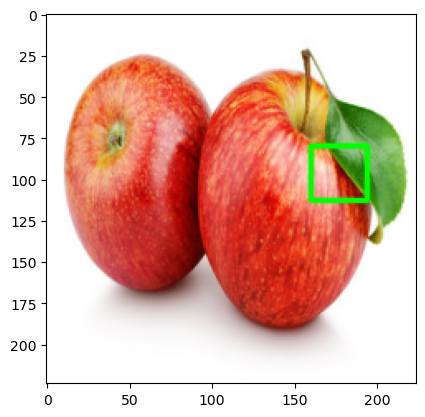

In [55]:
# script below generates small rectangle which represent sub pic
cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 2, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

#### Now produce example for all pics derived from uploaded main picture 

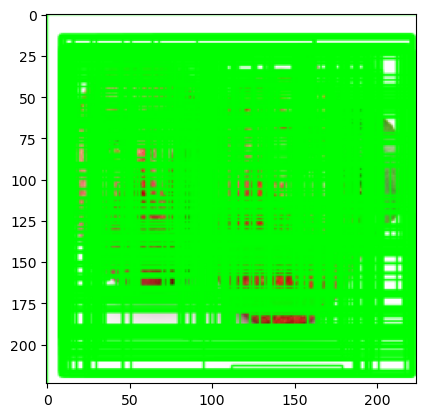

In [56]:
## We ask to highlight pics checked by model which definately 
## DO NOT represent FULL apple (whole apple , not piece it)

imout = image.copy()

for count ,result in enumerate(ssresults): # loop through coordinates of each sub pic
            # if count < 1000: # number cant be set
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w] # this is sub pic, cut from main image
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                
                # generate prediction for single sub pic
                out= model.predict(img, verbose = 0)
                
                if out[0][0] < 0.1: # less that 10% that apple is on sub pic (proposal)
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
                     # code above draws rectangles on main picture
plt.figure()
plt.imshow(imout)

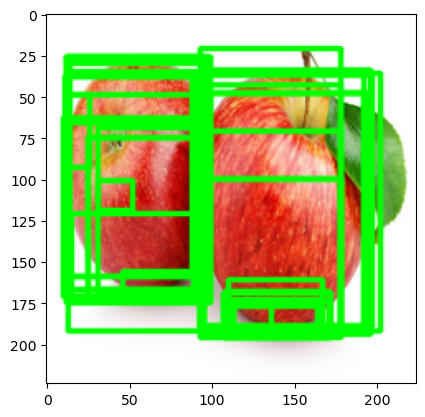

In [57]:
imout = image.copy() # need to refresh picture

## We ask to highlight pics checked by model which most probably 
## DO represent FULL apple (whole apple , not piece it)

## Ideally , we would expect limited number of highlighted areas
## indicating that model design is on track

for count,result in enumerate(ssresults):
           # if count < 4000: # 
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                
                # generate prediction for single sub pic
                out= model.predict(img, verbose = 0)
                
                if out[0][0] > 0.7: # definetely as apple, as argued by model
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 2, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

In [ ]:
# Possible Direction:

#  Increase complexity of model , however , full VGG16 performs worser compare to 
  # version in current notebook , maybe use pretrained VGG16 available in Keras

#  Add pics of apples parts as 0 labels and focus on full 
   # object , form + colour
    
# add threshhold to colors (threshhold for RGB) , change non red to white
# cv2.inRange